# Porcentage of E-Commerce Sales for a selected Region by enterprice size categories

In [4]:
%run cleaning_ecommerce_sales.ipynb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions
import dictionaries

df_cat, df_all = import_df_ecommerce() # type: ignore

/var/folders/x5/xrbwdz1510vcx8w5dcdp2s7m0000gn/T/ipykernel_97114/2595952571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_all.drop(columns=["size_emp"], inplace=True) # Delete size column as there is only one size in DF


## Hypotesis
- Smaller firms grew in the latest years as technology became more affordable

Western Europe


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
size_emp,,,,,,,,,,,,,,,
B(10-49),16.14,13.95,14.11,13.98,13.36,15.28,16.08,15.51,16.22,17.00,16.04,17.79,17.90,17.86,19.04
C(50-249),25.92,22.07,25.02,23.08,21.85,25.10,25.23,26.07,24.62,26.06,25.51,25.71,25.90,26.76,27.52
D(>=250),37.87,32.29,37.31,36.07,33.73,36.40,37.52,38.63,39.71,39.30,39.34,37.16,37.64,40.00,40.72


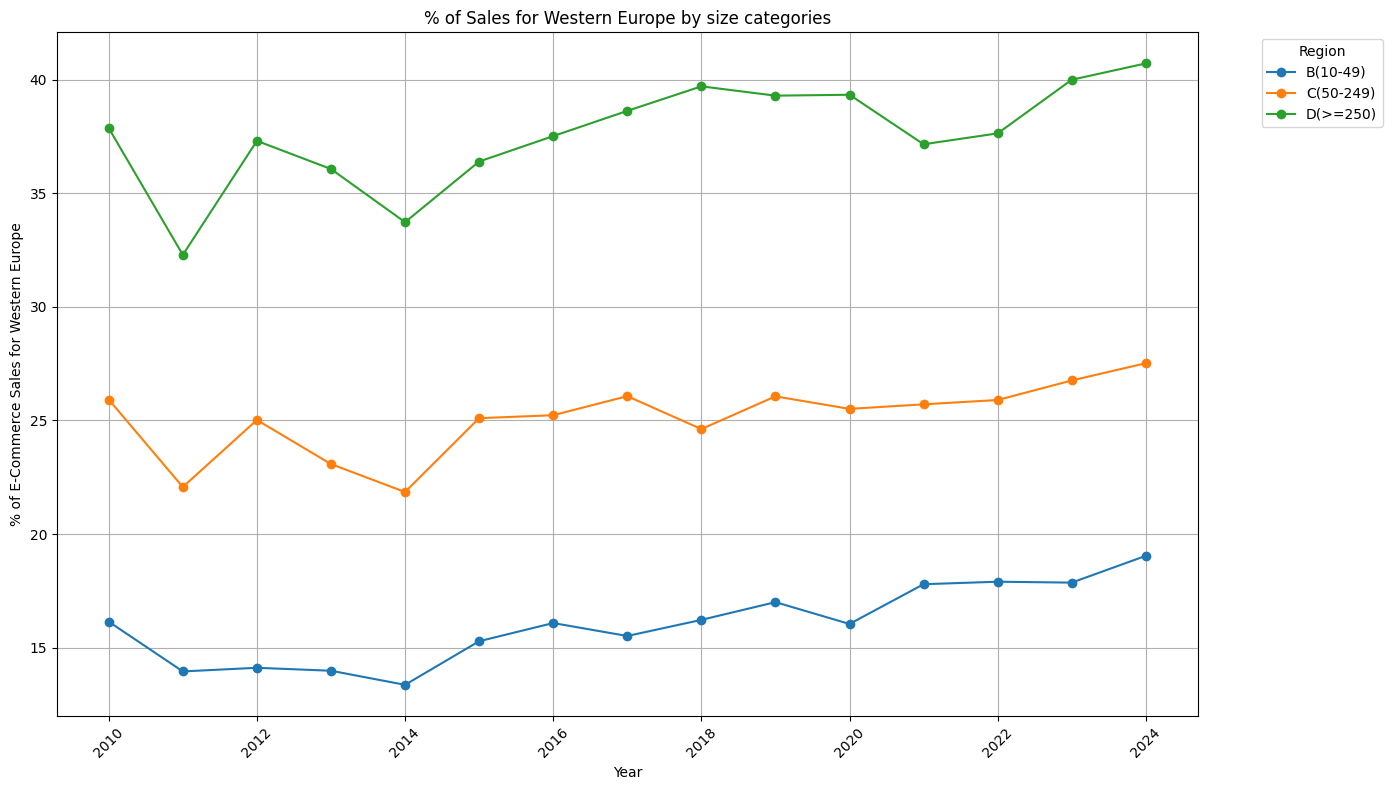

Central Europe


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
size_emp,,,,,,,,,,,,,,,
B(10-49),9.04,12.23,12.66,13.14,12.89,12.96,13.31,14.13,13.96,15.28,16.88,16.61,16.99,16.94,16.93
C(50-249),14.20,19.46,16.74,18.42,19.31,19.94,19.45,21.89,22.10,22.01,23.06,22.40,23.34,23.27,24.43
D(>=250),25.11,30.49,31.36,32.91,32.52,35.37,38.10,38.17,38.96,41.25,42.87,43.90,43.52,44.52,42.89


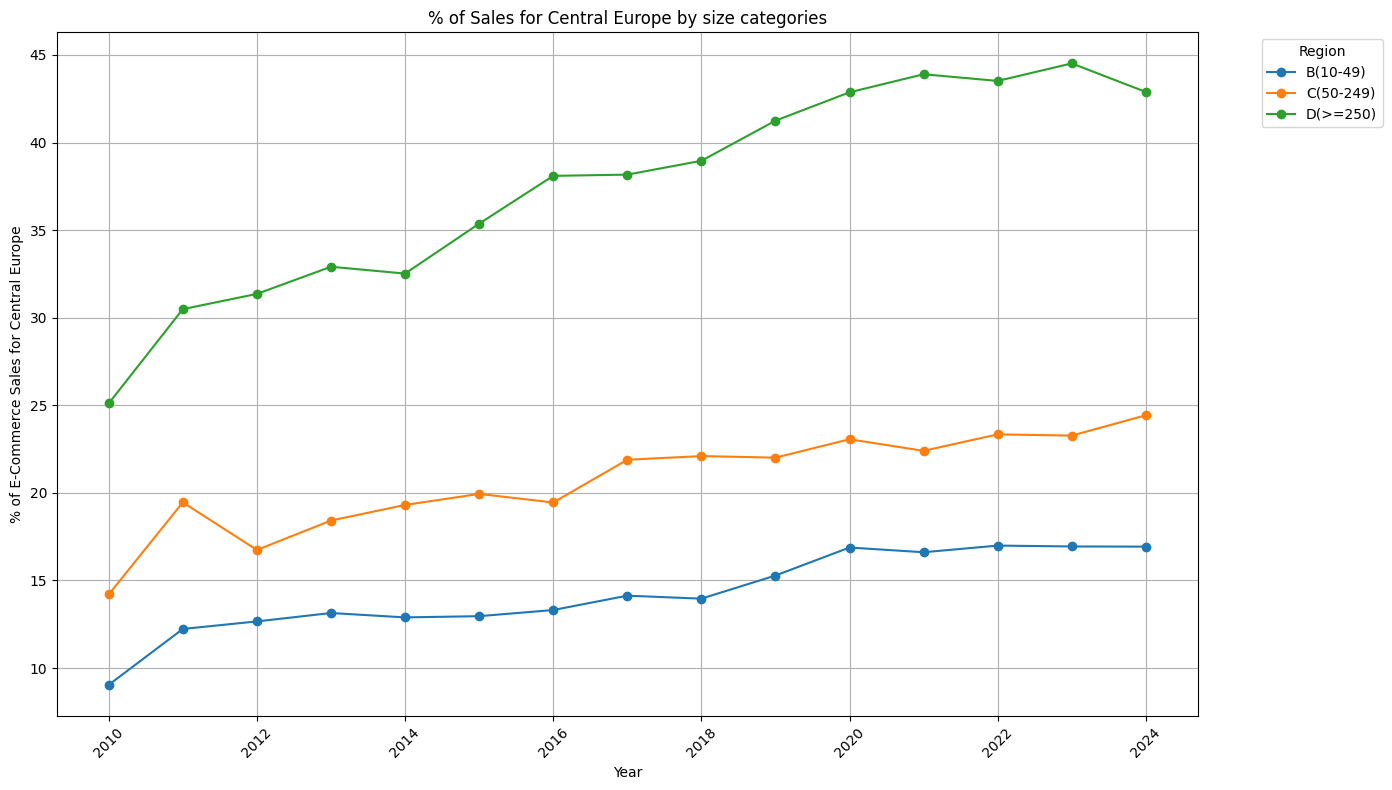

Northern Europe


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
size_emp,,,,,,,,,,,,,,,
B(10-49),18.90,19.81,22.75,19.99,20.22,21.70,22.21,23.59,24.08,26.52,24.35,28.74,30.83,28.33,31.27
C(50-249),32.16,31.45,37.07,33.28,34.29,35.91,35.31,36.56,38.47,40.01,35.20,40.10,40.87,39.80,42.31
D(>=250),41.41,42.82,47.57,45.31,44.80,48.98,48.89,50.04,50.11,53.00,46.57,55.58,52.13,53.42,55.86


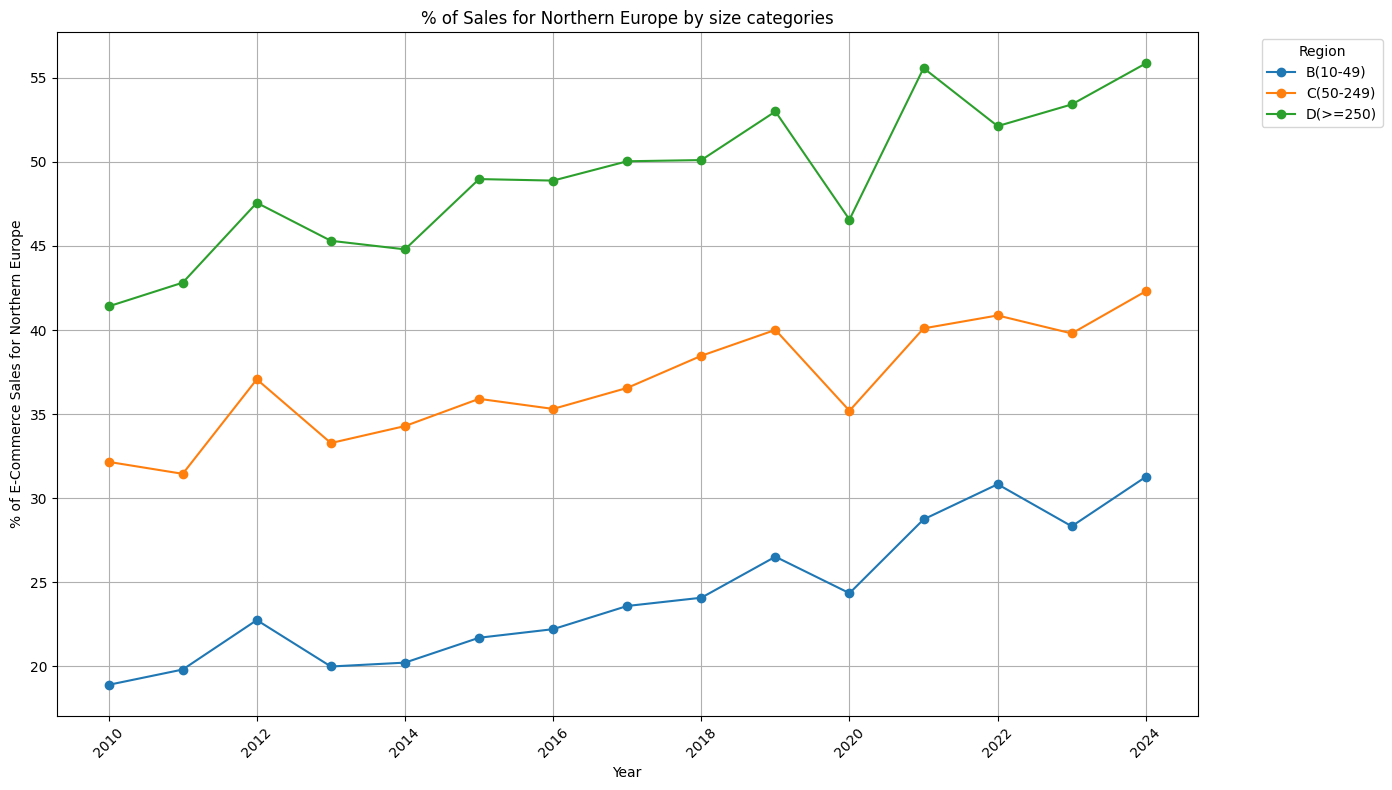

Eastern Europe


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
size_emp,,,,,,,,,,,,,,,
B(10-49),9.92,10.29,9.35,8.80,10.33,9.51,10.04,13.76,14.19,16.37,18.67,19.29,18.00,20.21,21.61
C(50-249),12.68,12.82,12.70,10.73,13.77,14.01,14.23,18.64,19.17,20.40,23.62,24.75,23.10,27.08,29.09
D(>=250),15.96,17.89,15.80,14.85,15.99,19.68,21.16,26.00,26.79,28.10,30.63,34.16,35.44,35.76,37.78


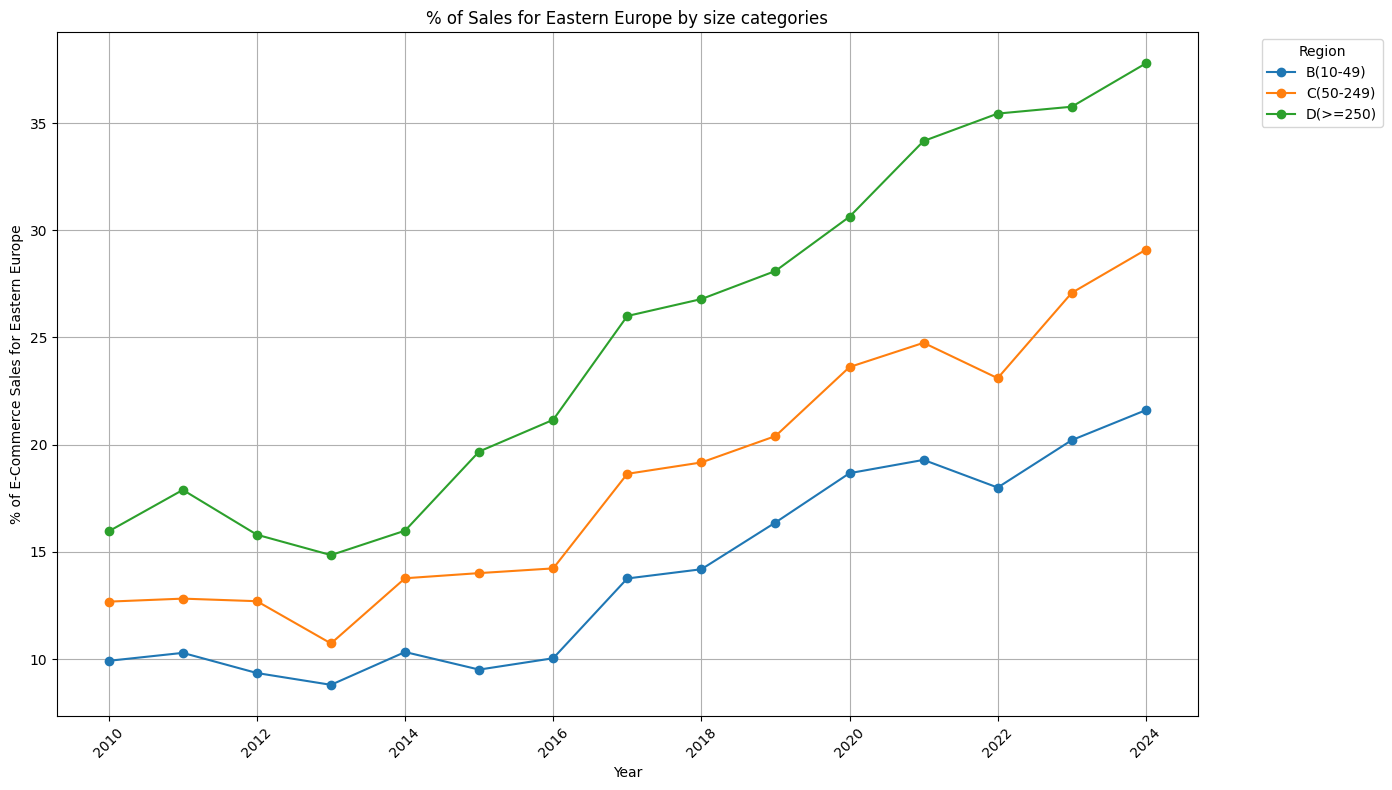

Southern Europe


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
size_emp,,,,,,,,,,,,,,,
B(10-49),9.49,8.58,8.72,7.92,10.15,10.83,12.39,11.80,12.60,12.73,15.71,17.25,19.51,19.83,21.32
C(50-249),15.17,15.29,16.31,17.30,20.39,19.89,21.80,21.94,22.70,22.25,23.65,25.40,28.74,28.03,27.14
D(>=250),21.52,24.33,24.53,23.36,27.52,26.22,28.19,29.76,30.87,32.56,33.48,34.52,36.91,40.49,40.08


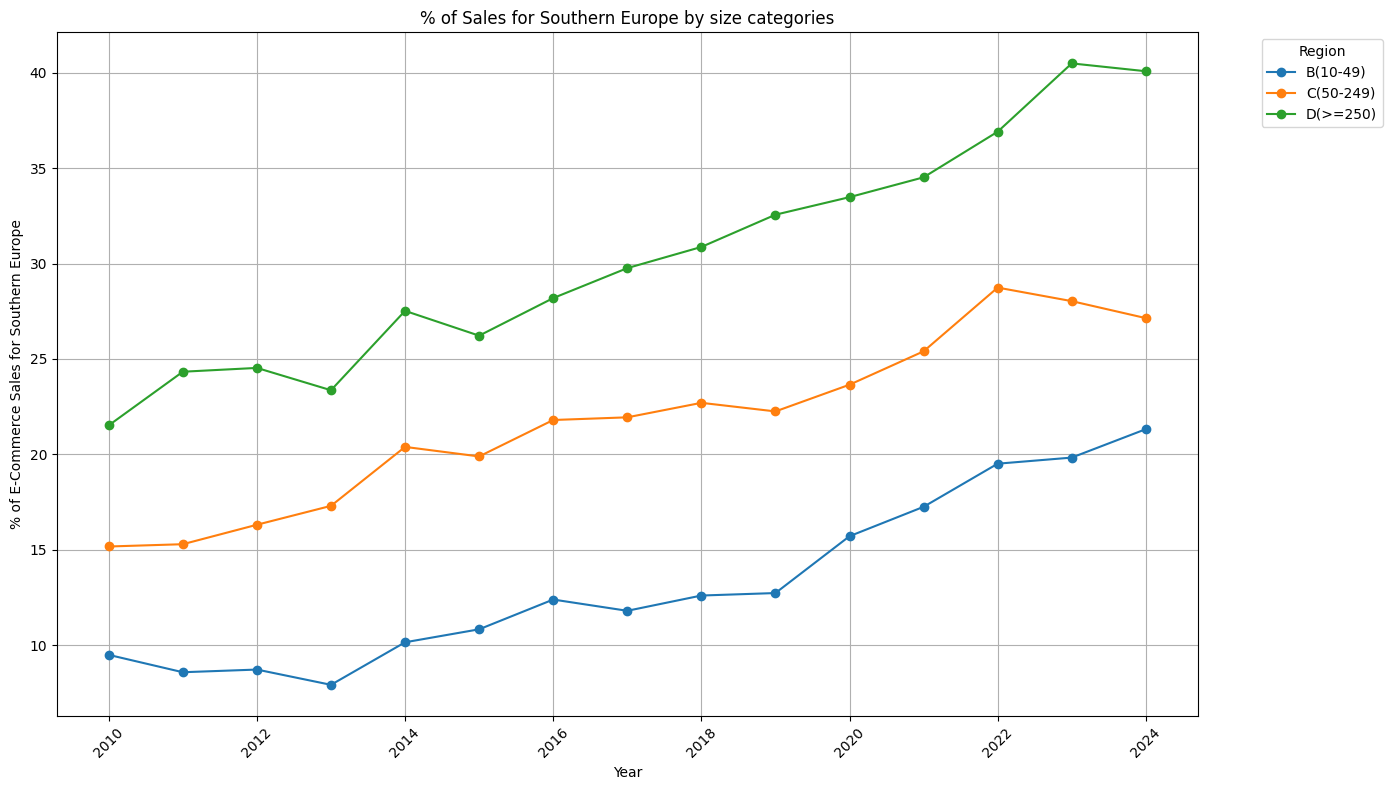

In [5]:
# selected_region = "Eastern Europe"

for region in dictionaries.regions.keys():
    print(region)
    df_filter = df_cat[df_cat["region"] == region]
    df_regions_years = df_filter.pivot(index=["country", "size_emp"], columns="year", values="sales").reset_index()
    df_region_select = df_regions_years.groupby(["size_emp"]).mean(numeric_only=True).round(2)

    display(df_region_select)

    # Preprocess for plotting
    df_transposed = df_region_select.T # transposing DF to have years as rows and country as columns
    df_transposed.index = df_transposed.index.astype(int) # Convert the index (years) to integers for proper plotting /!\

    # Plot the data
    functions.plot_line_chart(
        df_transposed, 
        'Year', 
        f'% of E-Commerce Sales for {region}', 
        f'% of Sales for {region} by size categories',
        'Region',
        )